<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

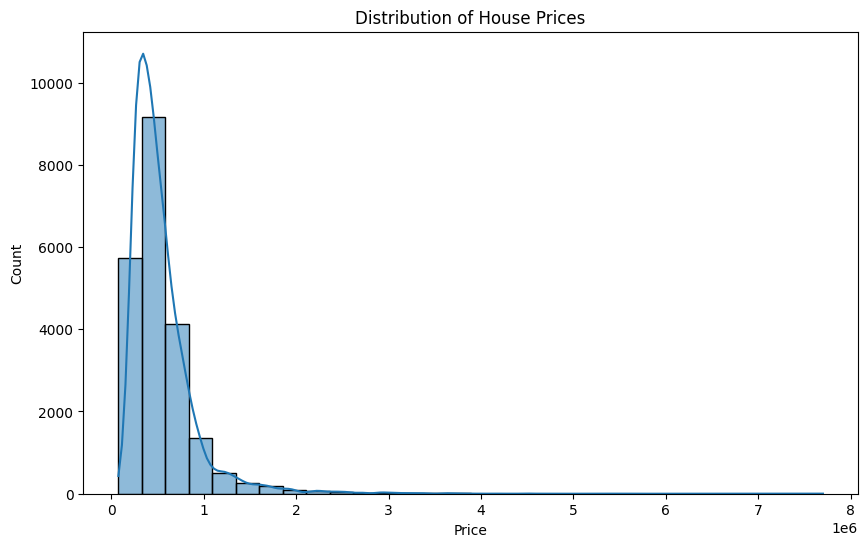

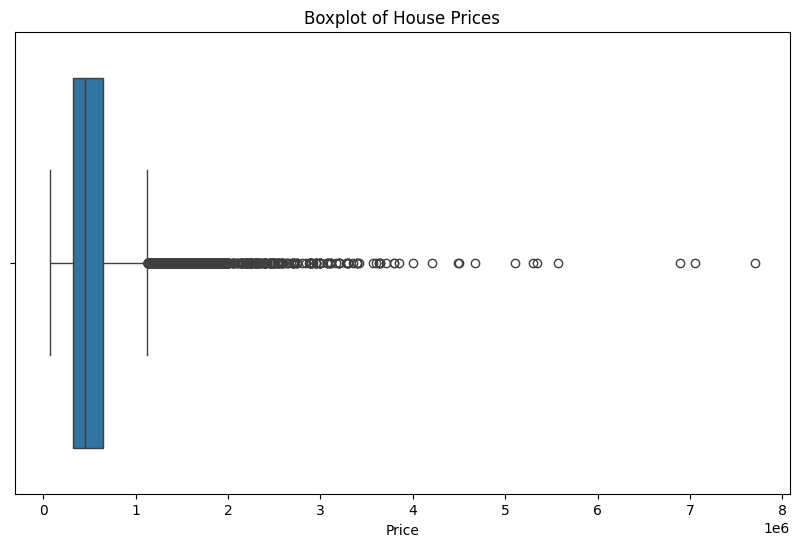

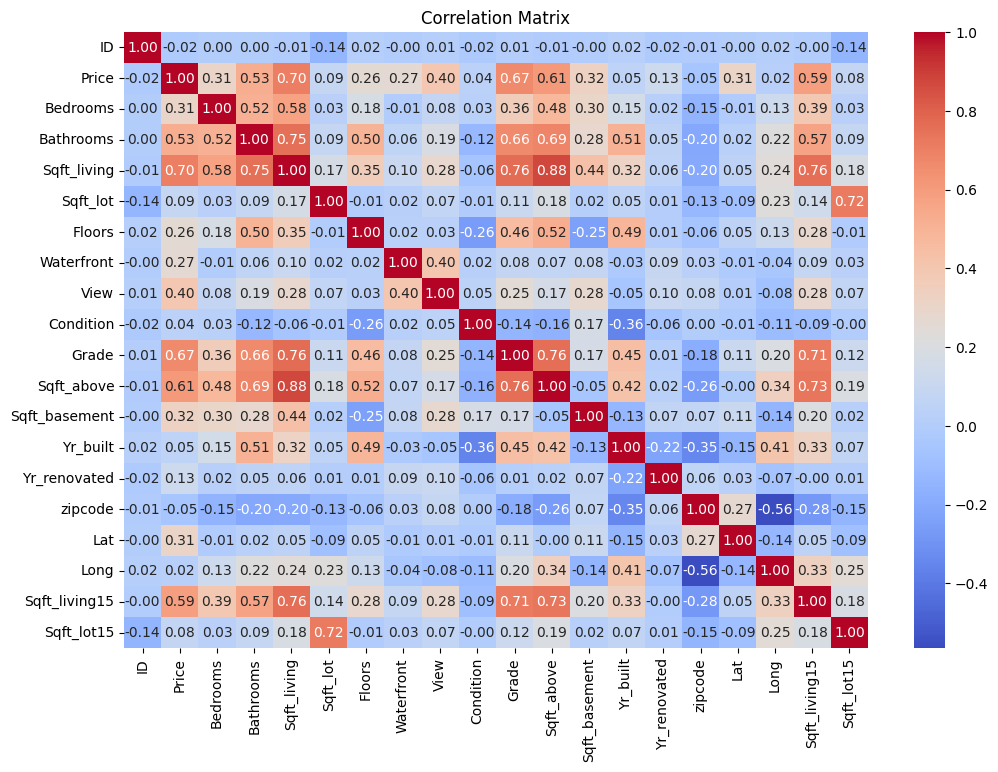

Columns in dataset: Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')


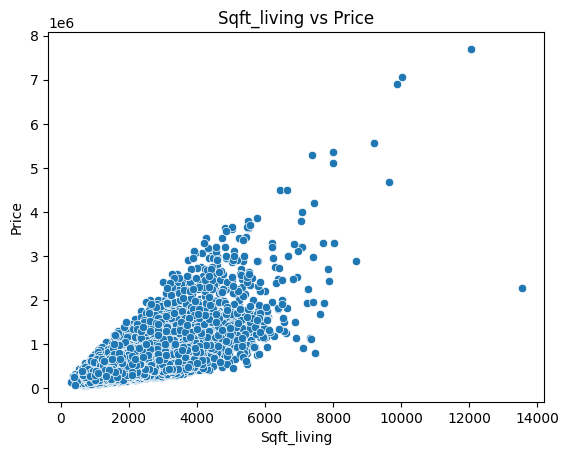

Model Performance:
Root Mean Squared Error (RMSE): 190874.91
R-squared (R2): 0.70


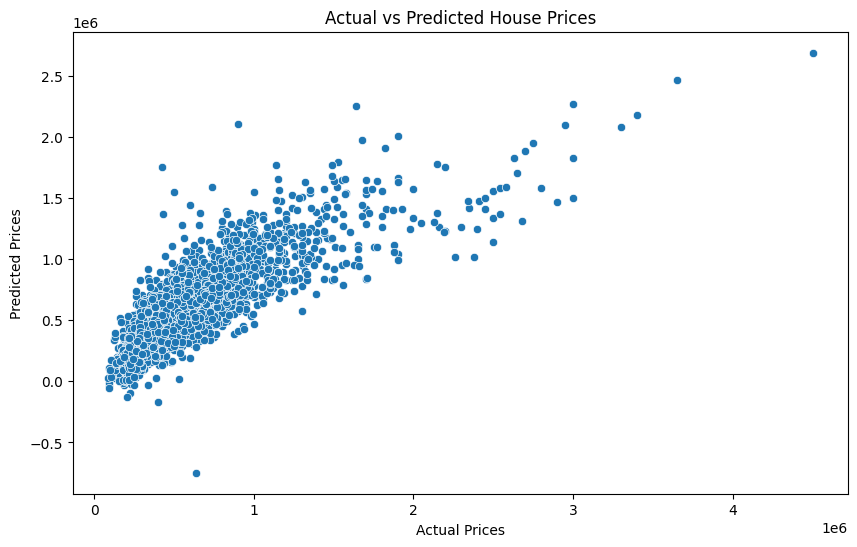

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('House Prices.csv')

# Basic data inspection
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Visualize distribution of target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Boxplot for 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=data)
plt.title('Boxplot of House Prices')
plt.show()

# Correlation matrix heatmap for numeric features
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check column names to identify features
print("Columns in dataset:", data.columns)

# Example: visualize relationship between 'Sqft_living' and 'Price'
if 'Sqft_living' in data.columns:
    sns.scatterplot(x='Sqft_living', y='Price', data=data)
    plt.title('Sqft_living vs Price')
    plt.show()

# Handle missing values (simple strategy: drop or fill)
# For simplicity, drop missing values
data = data.dropna()

# Encode categorical variables if any
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

# Define features and target variable
X = data.drop(['Price', 'Date'], axis=1, errors='ignore')  # Drop 'Price' and 'Date' if present
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: visualize predicted vs actual
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()